# Introduction

This tutorial is about exploring and analyzing data from the College Scorecard. The College Scorecard is a part of the U.S. Department of Education. The goal of the scorecard is to make colleges more transparent by providing data sets about colleges around the United States. Students can see information about diversity, tuition, number of degrees per major, numbers of students, post-school salaries, and much more. This information is very helpful for people who are applying to college. It is important for prospecting students to try to get a personal understanding of potential colleges from the perspective of current students, as well as a fact-based understanding from reading up on data that has been left out of their college tours and brochures. Students can use the College Scorecard to compare and contrast the colleges of their choice in order to make sure they are picking the school that is right for them. The scorecard is also helpful for universities, because they can compare themselves to other schools and improve by replicating the techniques of the successful schools. 

Here is a link to the College Scorecard website: https://collegescorecard.ed.gov/

We will specifically look into diversity on college campuses. We will predict how diverse a school is based on its location, tuition, and other attributes. This will give us insight into which features attract people of different races. The data we are using was last updated on October 30th, 2018.



In [1]:
!pip install folium

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import folium
import json
import os
import requests
import pandas as pd
import numpy as np
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from sklearn import linear_model

## Load Data
Load the data from the Most-Recent-Cohorts-All-Data-Elements CSV into a data frame and see the first 5 elements in the data with odata.head()

In [10]:
odata = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv")

odata.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,9,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019,1021,1022,1023,1027,1028,1029,1030,1031,1032,1034,1035,1036,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1065,1066,1067,1068,1069,1070,1071,1073,1074,1075,1076,1078,1079,1080,1081,1082,1083,1084,1086,1087,1088,1089,1091,1092,1093,1094,1095,1096,1097,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1112,1113,1114,1115,1118,1119,1121,1122,1123,1125,1127,1128,1131,1132,1134,1135,1136,1138,1140,1141,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1170,1171,1172,1173,1174,1175,1177,1178,1179,1180,1183,1184,1185,1186,1187,1188,1190,1192,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,123

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,0.4694,0.5136,0.0034,0.1429,0.3401,0.3333,0.3333,0,0,0.6667
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.6117,0.624,0.0075,0.2166,0.1519,0.3642,0.4,0.0434,0.2755,0.2811
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.5503,0.5562,0.0059,0.4379,0,0.4429,0.4714,0.0429,0.4857,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5456,0.5651,0.0123,0.2841,0.1385,0.3378,0.3547,0.0236,0.4257,0.1959
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4105,0.429,0.0062,0.216,0.3488,0.2931,0.3103,0.0345,0.3966,0.2586


## Select Relevant Columns
Select the specific columns from the data you would like to focus on. The table has 1,899 columns. Here we focus on institution name, city, state abbreviation, longitude, latitiude, all boy schools, all girl schools, admission rate, in-state tuition, out-of-state tuition, and the number of undergraduates. The full names of the abbreviated column headings can be found in the data dictionary which can be downloaded from the "datadictionary" link under the Data Documentation heading on the right hand side of this webpage: https://collegescorecard.ed.gov/data/

In [4]:
# Choose specific columns to display
data = odata[['INSTNM', 'CITY', 'STABBR', 'LONGITUDE', 'LATITUDE', 'MENONLY', 'WOMENONLY','ADM_RATE', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'UGDS']]
# made a sample of the orignal data set
ndata = data.sample(n = 1000)
ndata.head()

,INSTNM,CITY,STABBR,LONGITUDE,LATITUDE,MENONLY,WOMENONLY,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS
6052,National University College-Caguas,Caguas,PR,-66.039846,18.223533,0.0,0.0,0.7681,6495.0,6495.0,1088.0
503,United Education Institute-Huntington Park Campus,Huntington Park,CA,-118.226206,33.986057,0.0,0.0,NaN,NaN,NaN,598.0
604,Rensselaer at Hartford,Hartford,CT,-72.673916,41.773462,0.0,0.0,NaN,NaN,NaN,NaN
6305,Toni & Guy Hairdressing Academy-Manteca,Manteca,CA,-121.217294,37.788771,0.0,0.0,NaN,NaN,NaN,16.0
5538,Galen College of Nursing-Cincinnati,Cincinnati,OH,-84.365946,39.283693,0.0,0.0,NaN,NaN,NaN,407.0


## Tidy Data


In [5]:
#TIDY
gender = []
for index, row in ndata.iterrows():
    if np.isnan(row ['WOMENONLY']) | np.isnan(row ['MENONLY']):
          gender.append(float('nan'))
    elif (row ['WOMENONLY'] == 1.) & (row ['MENONLY'] == 0.):
        gender.append('WOMENONLY')
    elif (row ['MENONLY'] == 1.) & (row ['WOMENONLY'] == 0.):
        gender.append('MENONLY')
    else:# (row ['WOMENONLY']) == 0. & (row ['MENONLY']) == 0.:
         gender.append('CO-ED')

ndata = ndata.drop(columns=['WOMENONLY', 'MENONLY'])
ndata['GENDER']= gender

ndata.head()

,INSTNM,CITY,STABBR,LONGITUDE,LATITUDE,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,GENDER
6052,National University College-Caguas,Caguas,PR,-66.039846,18.223533,0.7681,6495.0,6495.0,1088.0,CO-ED
503,United Education Institute-Huntington Park Campus,Huntington Park,CA,-118.226206,33.986057,NaN,NaN,NaN,598.0,CO-ED
604,Rensselaer at Hartford,Hartford,CT,-72.673916,41.773462,NaN,NaN,NaN,NaN,CO-ED
6305,Toni & Guy Hairdressing Academy-Manteca,Manteca,CA,-121.217294,37.788771,NaN,NaN,NaN,16.0,CO-ED
5538,Galen College of Nursing-Cincinnati,Cincinnati,OH,-84.365946,39.283693,NaN,NaN,NaN,407.0,CO-ED


In [6]:
#TIDY
race = []
# for index, row in ndata.iterrows():
#     if np.isnan(row ['WOMENONLY']) | np.isnan(row ['MENONLY']):
#           gender.append(float('nan'))
#     elif (row ['WOMENONLY'] == 1.) & (row ['MENONLY'] == 0.):
#         gender.append('WOMENONLY')
#     elif (row ['MENONLY'] == 1.) & (row ['WOMENONLY'] == 0.):
#         gender.append('MENONLY')
#     else:# (row ['WOMENONLY']) == 0. & (row ['MENONLY']) == 0.:
#          gender.append('CO-ED')

# ndata = ndata.drop(columns=['WOMENONLY', 'MENONLY'])
# ndata['GENDER']= gender
ndata

,INSTNM,CITY,STABBR,LONGITUDE,LATITUDE,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,GENDER
6052,National University College-Caguas,Caguas,PR,-66.039846,18.223533,0.7681,6495.0,6495.0,1088.0,CO-ED
503,United Education Institute-Huntington Park Campus,Huntington Park,CA,-118.226206,33.986057,NaN,NaN,NaN,598.0,CO-ED
604,Rensselaer at Hartford,Hartford,CT,-72.673916,41.773462,NaN,NaN,NaN,NaN,CO-ED
6305,Toni & Guy Hairdressing Academy-Manteca,Manteca,CA,-121.217294,37.788771,NaN,NaN,NaN,16.0,CO-ED
5538,Galen College of Nursing-Cincinnati,Cincinnati,OH,-84.365946,39.283693,NaN,NaN,NaN,407.0,CO-ED
3514,Lee College,Baytown,TX,-94.976724,29.731654,NaN,1672.0,3520.0,6989.0,CO-ED
5607,Jersey College,Teterboro,NJ,-74.057936,40.862137,0.7108,NaN,NaN,2413.0,CO-ED
6447,Preparing People Barber Styling College,Dallas,TX,-96.764386,32.773309,NaN,NaN,NaN,65.0,CO-ED
6369,American Institute-Toms River,Toms River,NJ,-74.220894,40.044556,NaN,NaN,NaN,359.0,CO-ED
2725,Hocking College,Nelsonville,OH,-82.220791,39.441954,NaN,4390.0,8780.0,2812.0,CO-ED


In [7]:
map_osm = folium.Map(location=[39.29, -100.61], zoom_start=4)

noNaN = ndata.dropna(subset = ['LATITUDE', 'LONGITUDE'])

for index, row in noNaN.iterrows():   
    color= 'black'
    folium.Circle(
    radius=1000,
    location=[row['LATITUDE'], row['LONGITUDE']],
    color=color,
    fill=True,
    tooltip = row['INSTNM']
).add_to(map_osm)
    
#map_osm

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

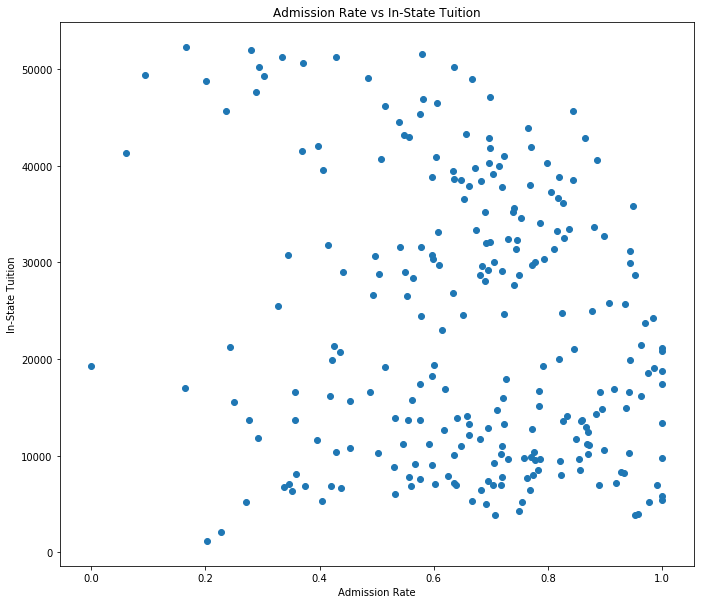

In [8]:

fig = plt.figure(figsize=(25,10))
plot = fig.add_subplot(121)
plot.scatter(ndata['ADM_RATE'],ndata['TUITIONFEE_IN']);


plot.set_title("Admission Rate vs In-State Tuition")
plot.set_xlabel("Admission Rate")
plot.set_ylabel("In-State Tuition")
plt


1000

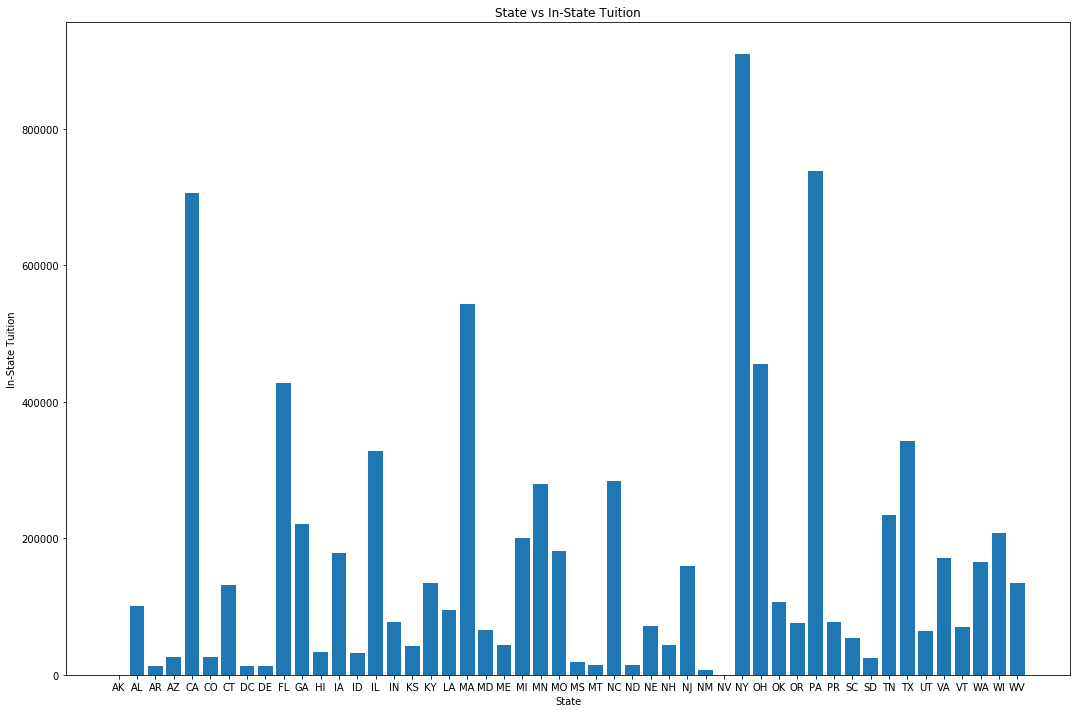

In [9]:
fig = plt.figure(figsize=(18,12))  
plot = fig.add_subplot(1,1,1) 

State_Abbr = []
for ele, df in ndata.groupby('STABBR'):
    State_Abbr.append(str(ele)) 
    
tuition_averages = []
for b, df in ndata.groupby('STABBR'):
    t = df['TUITIONFEE_IN'].sum()
    
    tuition_averages.append(t)
    
x_pos = [i for i, _ in enumerate(State_Abbr)]
plt.bar(State_Abbr, tuition_averages)
plot.set_title("State vs In-State Tuition")
plot.set_xlabel("State")
plot.set_ylabel("In-State Tuition")
plt

len(ndata['TUITIONFEE_IN'])